#**Given an input Audio Generate a speaking AI Avatar**

Combining the Avatar Pipeline

1.   blinking animation

2.   Video Retalking

3.   CodeFormer for quality enhancement



Mount your Google Drive Account to access the share folder containing reference video and input audio files

In [1]:
from google.colab import drive

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

only add the name

```
eg. input_audio3
```

don't add the extension like below
```
eg. input_audio3.wav
```

In [ ]:
input_audio_name = "input_audio3"  # @param {}

In [ ]:
%cd /content/

/content


In [ ]:
!wget 'https://github.com/tzutalin/dlib-android/raw/master/data/shape_predictor_68_face_landmarks.dat'
! pip install ffmpeg --progress-bar off

--2024-08-02 09:28:34--  https://github.com/tzutalin/dlib-android/raw/master/data/shape_predictor_68_face_landmarks.dat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tzutalin/dlib-android/master/data/shape_predictor_68_face_landmarks.dat [following]
--2024-08-02 09:28:35--  https://raw.githubusercontent.com/tzutalin/dlib-android/master/data/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat’

shape_predictor_68_ 100%[===================>]  95.08M  56.6MB/s    in 1.7s  

In [ ]:
%ls

drive/  sample_data/  shape_predictor_68_face_landmarks.dat


In [ ]:
import cv2
import os
import shutil
import random

'''

import the blink reference video and split the frames

'''

BLINK_REFERENCE_PATH = '/content/drive/MyDrive/AI Avatar Assets/blink_reference.mp4'

vidcap = cv2.VideoCapture(BLINK_REFERENCE_PATH)
success, image = vidcap.read()

if not os.path.exists('./frames/'):
    os.mkdir("/content/frames/")
    os.mkdir('/content/frames/frames_converted/')

count = 0

while success:
    os.chdir('/content/frames')
    resized = cv2.resize(image, (256, 256))
    cv2.imwrite("%d.jpg" % count, image)  # save frame as JPEG file
    success, image = vidcap.read()
    # print('Read a new frame: ', success)
    count += 1

os.chdir('..')

# create duplicates of the initial blinking frames to have multiple blinks in the video
source = './frames'
dest = './blinks'

files_to_copy = ['3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg']

if not os.path.exists(dest):
    os.makedirs(dest)

for index, file in enumerate(files_to_copy, start=1):
    new_filename = str(int(os.path.splitext(file)[0])) + '.jpg'

    source_file_path = os.path.join(source, file)
    destination_file_path = os.path.join(dest, new_filename)

    shutil.copy2(source_file_path, destination_file_path)
    # print(f"Copied the blinking scene {file} to {dest} as {new_filename}")

new_blinks = []
total_frames = 193  # total number of frames - hardcoded change later

final_prev = 9

x = random.randint(final_prev + 25, total_frames - 11)

for i in range(x - 3, x + 3):
    new_blinks.append(i)

# print(new_blinks)

new_blinks = [str(blink) + ".jpg" for blink in new_blinks]
# print(new_blinks)

for idx, filename in enumerate(files_to_copy):
    if filename.lower().endswith(('.jpg', '.png')):
        file_path = os.path.join('./frames', filename)
        img = cv2.imread(file_path)
        new_filename = new_blinks[idx]

        # print(f'{filename} -> {new_filename}')
        new_path = os.path.join('./blinks', new_filename)

        cv2.imwrite(new_path, img)
    else:
        continue



'''

import the base video (to which the blinking will be added) and split the frames

'''

BASE_REFERENCE_PATH = '/content/drive/MyDrive/AI Avatar Assets/base_video_short.mp4'

seconds = 8
fps = 25
frames = 8*fps

import cv2
import os


# break down the base video frames
vidcap = cv2.VideoCapture(BASE_REFERENCE_PATH)
success,image = vidcap.read()

if not os.path.exists('./frames_base/'):
  os.mkdir("/content/frames_base/")
  os.mkdir('/content/frames_base/frames_converted/')

count = 0
while success:
  %cd /content/frames_base
  if count > frames:
    break

  resized_image = cv2.resize(image, (512, 512))
  # cv2.imwrite("frame_%d.jpg" % count, resized_image)
  cv2.imwrite("%d.jpg" % count, resized_image)
  success,image = vidcap.read()
  # print('Read a new frame: ', success)
  count += 1

# print(count)

%cd ..


/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/frames_base
/content/fram

In [ ]:
%ls

blinks/  drive/  frames/  frames_base/  sample_data/  shape_predictor_68_face_landmarks.dat


In [ ]:
import cv2
import numpy as np
import dlib
import time
import os
import random


def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index


counter = 0

folder_path = '/content/frames'
file_list = os.listdir(folder_path)


file_list.sort(key=lambda f: int(os.path.splitext(f)[0]) if f[:-4].isdigit() else float('inf'))

for idx, filename in enumerate(file_list):
  base_file_path = f'./frames_base/{filename}'
  img2 = cv2.imread(base_file_path)
  # print(base_file_path)

  try :
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  except:
    break

  if filename.lower().endswith(('.png', '.jpg')) and os.path.exists(f'./blinks/{filename}'):
      file_path = os.path.join('./blinks', filename)
      # print(file_path)
      print(file_path)

      img = cv2.imread(file_path)

      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      mask = np.zeros_like(img_gray)

      detector = dlib.get_frontal_face_detector()
      predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")
      height, width, channels = img2.shape
      img2_new_face = np.zeros((height, width, channels), np.uint8)

      # Face 1
      faces = detector(img_gray)
      for face in faces:
          landmarks = predictor(img_gray, face)
          landmarks_points = []
          for n in range(0, 68):
              x = landmarks.part(n).x
              y = landmarks.part(n).y


              landmarks_points.append((x, y))

          points = np.array(landmarks_points, np.int32)
          convexhull = cv2.convexHull(points)

          cv2.fillConvexPoly(mask, convexhull, 255)

          face_image_1 = cv2.bitwise_and(img, img, mask=mask)

          # Delaunay triangulation
          rect = cv2.boundingRect(convexhull)
          subdiv = cv2.Subdiv2D(rect)
          subdiv.insert(landmarks_points)
          triangles = subdiv.getTriangleList()
          triangles = np.array(triangles, dtype=np.int32)

          indexes_triangles = []
          for t in triangles:
              pt1 = (t[0], t[1])
              pt2 = (t[2], t[3])
              pt3 = (t[4], t[5])

              index_pt1 = np.where((points == pt1).all(axis=1))
              index_pt1 = extract_index_nparray(index_pt1)

              index_pt2 = np.where((points == pt2).all(axis=1))
              index_pt2 = extract_index_nparray(index_pt2)

              index_pt3 = np.where((points == pt3).all(axis=1))
              index_pt3 = extract_index_nparray(index_pt3)

              if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
                  triangle = [index_pt1, index_pt2, index_pt3]
                  indexes_triangles.append(triangle)

      # Face 2
      faces2 = detector(img2_gray)
      for face in faces2:
          landmarks = predictor(img2_gray, face)
          landmarks_points2 = []

          for n in range(0, 68):
              x = landmarks.part(n).x
              y = landmarks.part(n).y
              landmarks_points2.append((x, y))

          points2 = np.array(landmarks_points2, np.int32)
          convexhull2 = cv2.convexHull(points2)

      lines_space_mask = np.zeros_like(img_gray)
      lines_space_new_face = np.zeros_like(img2)

      # Triangulation of both faces
      for triangle_index in indexes_triangles:

          # Triangulation of the first face
          tr1_pt1 = landmarks_points[triangle_index[0]]
          tr1_pt2 = landmarks_points[triangle_index[1]]
          tr1_pt3 = landmarks_points[triangle_index[2]]
          triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

          rect1 = cv2.boundingRect(triangle1)
          (x, y, w, h) = rect1
          cropped_triangle = img[y: y + h, x: x + w]
          cropped_tr1_mask = np.zeros((h, w), np.uint8)

          points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                              [tr1_pt2[0] - x, tr1_pt2[1] - y],
                              [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

          cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

          # Lines space
          lines_space_mask = np.zeros_like(img_gray)
          cv2.fillConvexPoly(lines_space_mask, convexhull, 255)
          lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)

          # Triangulation of second face
          tr2_pt1 = landmarks_points2[triangle_index[0]]
          tr2_pt2 = landmarks_points2[triangle_index[1]]
          tr2_pt3 = landmarks_points2[triangle_index[2]]
          triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

          rect2 = cv2.boundingRect(triangle2)
          (x, y, w, h) = rect2

          cropped_tr2_mask = np.zeros((h, w), np.uint8)

          points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                              [tr2_pt2[0] - x, tr2_pt2[1] - y],
                              [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

          cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

          # Warp triangles
          points = np.float32(points)
          points2 = np.float32(points2)
          M = cv2.getAffineTransform(points, points2)
          warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
          warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

          # Reconstructing destination face
          img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
          img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
          _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
          warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

          img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
          img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

      # Face swapped (putting 1st face into 2nd face)
      img2_face_mask = np.zeros_like(img2_gray)
      img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
      img2_face_mask = cv2.bitwise_not(img2_head_mask)

      img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
      result = cv2.add(img2_head_noface, img2_new_face)

      (x, y, w, h) = cv2.boundingRect(convexhull2)
      center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))


      # final clonning
      seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

      output_path = os.path.join('./frames_base/frames_converted', f"clone_{filename}")
      cv2.imwrite(output_path, seamlessclone)

  elif filename.lower().endswith(('.png', '.jpg')):

    output_path = os.path.join('./frames_base/frames_converted', f"clone_{filename}")
    cv2.imwrite(output_path, img2)

cv2.waitKey(0)

cv2.destroyAllWindows()


./blinks/3.jpg
./blinks/4.jpg
./blinks/5.jpg
./blinks/6.jpg
./blinks/7.jpg
./blinks/8.jpg
./blinks/44.jpg
./blinks/45.jpg
./blinks/46.jpg
./blinks/47.jpg
./blinks/48.jpg
./blinks/49.jpg


In [ ]:
import subprocess
import sys
import os
import re
import cv2

def create_video_from_frames(input_folder, output_file, frame_rate=25):

    frames = [f for f in os.listdir(input_folder) if re.match(r'clone_\d+\.jpg', f)]

    if not frames:
        print("No frames found in the specified folder.")
        return


    frames.sort(key=lambda x: int(re.search(r'\d+', x).group()))

    # Get the height and width of the first frame
    frame_path = os.path.join(input_folder, frames[0])
    first_frame = cv2.imread(frame_path)
    height, width, layers = first_frame.shape

    # Initialize VideoWriter object
    video = cv2.VideoWriter(output_file, cv2.VideoWriter_fourcc(*'mp4v'), frame_rate, (width, height))

    for frame in frames:
        frame_path = os.path.join(input_folder, frame)
        img = cv2.imread(frame_path)
        video.write(img)

    # Release the VideoWriter object
    video.release()

    print(f"Video created successfully: {output_file}")

create_video_from_frames('./frames_base/frames_converted', 'blinking_base_video.mp4')

Video created successfully: blinking_base_video.mp4


## Lip-Sync


### Set up

In [ ]:
%ls

blinking_base_video.mp4  drive/   frames_base/  shape_predictor_68_face_landmarks.dat
blinks/                  frames/  sample_data/


In [ ]:
## make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi

!python --version
!apt-get update
!apt install ffmpeg &> /dev/null

print('Git clone project and install requirements...')
!git clone https://github.com/vinthony/video-retalking.git &> /dev/null

/bin/bash: line 1: nvidia-smi: command not found
Python 3.10.12
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,787 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [907 kB

In [ ]:
%cd video-retalking

/content/video-retalking


In [ ]:
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -r requirements.txt

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.9.0+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.

In [ ]:
print('Download pre-trained models...')
!mkdir ./checkpoints
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/30_net_gen.pth -O ./checkpoints/30_net_gen.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/BFM.zip -O ./checkpoints/BFM.zip
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/DNet.pt -O ./checkpoints/DNet.pt
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/ENet.pth -O ./checkpoints/ENet.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/expression.mat -O ./checkpoints/expression.mat
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/face3d_pretrain_epoch_20.pth -O ./checkpoints/face3d_pretrain_epoch_20.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/GFPGANv1.3.pth -O ./checkpoints/GFPGANv1.3.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/GPEN-BFR-512.pth -O ./checkpoints/GPEN-BFR-512.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/LNet.pth -O ./checkpoints/LNet.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/ParseNet-latest.pth -O ./checkpoints/ParseNet-latest.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/RetinaFace-R50.pth -O ./checkpoints/RetinaFace-R50.pth
!wget https://github.com/vinthony/video-retalking/releases/download/v0.0.1/shape_predictor_68_face_landmarks.dat -O ./checkpoints/shape_predictor_68_face_landmarks.dat
!unzip -d ./checkpoints/BFM ./checkpoints/BFM.zip

Download pre-trained models...
--2024-08-01 16:59:20--  https://github.com/vinthony/video-retalking/releases/download/v0.0.1/30_net_gen.pth
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/OpenTalker/video-retalking/releases/download/v0.0.1/30_net_gen.pth [following]
--2024-08-01 16:59:20--  https://github.com/OpenTalker/video-retalking/releases/download/v0.0.1/30_net_gen.pth
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/536411820/38c02c2b-bf57-4d4e-9711-6cefdc5c817c?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240801%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20240801T165921Z&X-Amz-Expires=300&X-Amz-Signature=23abd6b1a5e42ae84fba9a604cae8c23185582ebb8c2e5d205

prepare the input (output from blinking algorithm)

In [ ]:
import os
import shutil

# move the input and audio file to lip-sync directory for video generation

source_video = '../blinking_base_video.mp4'
destination_video = '../video-retalking/examples/face/blinking_base_video.mp4'

if os.path.exists(source_video):
    os.makedirs(os.path.dirname(destination_video), exist_ok=True)

    shutil.move(source_video, destination_video)
    print(f"Video file moved successfully to {destination_video}")
else:
    print(f"Source video file {source_video} does not exist. Perhaps the file is already moved.")


input_audio_name = 'input_audio1'  # @param {}
source_audio = f'../drive/MyDrive/AI Avatar Assets/{input_audio_name}.wav'
destination_audio = f'../video-retalking/examples/audio/{input_audio_name}.wav'

if os.path.exists(source_audio):
    os.makedirs(os.path.dirname(destination_audio), exist_ok=True)

    shutil.copy2(source_audio, destination_audio)
    print(f"Audio file moved successfully to {destination_audio}")
else:
    print(f"Source audio file {source_audio} does not exist.")


Video file moved successfully to ../video-retalking/examples/face/blinking_base_video.mp4
Audio file moved successfully to ../video-retalking/examples/audio/input_audio1.wav


In [ ]:
%ls

checkpoints/        inference.py                 quick_demo.ipynb  utils/
CODE_OF_CONDUCT.md  inference_videoretalking.sh  README.md         video-retalking/
cog.yaml            LICENSE                      requirements.txt  webUI.py
docs/               models/                      temp/
examples/           predict.py                   third_part/


### Important Modification

#### Reduce the openned lip size

In [ ]:
  # scale down the focused region to cover less area of the mouth

  mouth_roi_scale_factor = 0.01
  oy1, oy2, ox1, ox2 = int(oy1 + (oy2 - oy1) * (1 - mouth_roi_scale_factor)), oy2, int(
      ox1 + (ox2 - ox1) * (0.5 - mouth_roi_scale_factor)), int(ox2 - (ox2 - ox1) * (0.5 - mouth_roi_scale_factor))


In [ ]:
%%writefile /content/video-retalking/inference.py
import numpy as np
import cv2, os, sys, subprocess, platform, torch
from tqdm import tqdm
from PIL import Image
from scipy.io import loadmat

sys.path.insert(0, 'third_part')
sys.path.insert(0, 'third_part/GPEN')
sys.path.insert(0, 'third_part/GFPGAN')

# 3dmm extraction
from third_part.face3d.util.preprocess import align_img
from third_part.face3d.util.load_mats import load_lm3d
from third_part.face3d.extract_kp_videos import KeypointExtractor
# face enhancement
from third_part.GPEN.gpen_face_enhancer import FaceEnhancement
from third_part.GFPGAN.gfpgan import GFPGANer
# expression control
from third_part.ganimation_replicate.model.ganimation import GANimationModel

from utils import audio
from utils.ffhq_preprocess import Croper
from utils.alignment_stit import crop_faces, calc_alignment_coefficients, paste_image
from utils.inference_utils import Laplacian_Pyramid_Blending_with_mask, face_detect, load_model, options, split_coeff, \
                                  trans_image, transform_semantic, find_crop_norm_ratio, load_face3d_net, exp_aus_dict
import warnings
warnings.filterwarnings("ignore")

args = options()

def main():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print('[Info] Using {} for inference.'.format(device))
    os.makedirs(os.path.join('temp', args.tmp_dir), exist_ok=True)

    enhancer = FaceEnhancement(base_dir='checkpoints', size=512, model='GPEN-BFR-512', use_sr=False, \
                               sr_model='rrdb_realesrnet_psnr', channel_multiplier=2, narrow=1, device=device)
    restorer = GFPGANer(model_path='checkpoints/GFPGANv1.3.pth', upscale=1, arch='clean', \
                        channel_multiplier=2, bg_upsampler=None)

    base_name = args.face.split('/')[-1]
    if os.path.isfile(args.face) and args.face.split('.')[1] in ['jpg', 'png', 'jpeg']:
        args.static = True
    if not os.path.isfile(args.face):
        raise ValueError('--face argument must be a valid path to video/image file')
    elif args.face.split('.')[1] in ['jpg', 'png', 'jpeg']:
        full_frames = [cv2.imread(args.face)]
        fps = args.fps
    else:
        video_stream = cv2.VideoCapture(args.face)
        fps = video_stream.get(cv2.CAP_PROP_FPS)

        full_frames = []
        while True:
            still_reading, frame = video_stream.read()
            if not still_reading:
                video_stream.release()
                break
            y1, y2, x1, x2 = args.crop
            if x2 == -1: x2 = frame.shape[1]
            if y2 == -1: y2 = frame.shape[0]
            frame = frame[y1:y2, x1:x2]
            full_frames.append(frame)

    print ("[Step 0] Number of frames available for inference: "+str(len(full_frames)))
    # face detection & cropping, cropping the first frame as the style of FFHQ
    croper = Croper('checkpoints/shape_predictor_68_face_landmarks.dat')
    full_frames_RGB = [cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) for frame in full_frames]
    full_frames_RGB, crop, quad = croper.crop(full_frames_RGB, xsize=512)

    clx, cly, crx, cry = crop
    lx, ly, rx, ry = quad
    lx, ly, rx, ry = int(lx), int(ly), int(rx), int(ry)
    oy1, oy2, ox1, ox2 = cly+ly, min(cly+ry, full_frames[0].shape[0]), clx+lx, min(clx+rx, full_frames[0].shape[1])


    # code related reducing lip animation
    mouth_roi_scale_factor = 0.01

    oy1, oy2, ox1, ox2 = int(oy1 + (oy2 - oy1) * (1 - mouth_roi_scale_factor)), oy2, int(
         ox1 + (ox2 - ox1) * (0.5 - mouth_roi_scale_factor)), int(ox2 - (ox2 - ox1) * (0.5 - mouth_roi_scale_factor))


    # original_size = (ox2 - ox1, oy2 - oy1)
    frames_pil = [Image.fromarray(cv2.resize(frame,(256,256))) for frame in full_frames_RGB]

    # get the landmark according to the detected face.
    if not os.path.isfile('temp/'+base_name+'_landmarks.txt') or args.re_preprocess:
        print('[Step 1] Landmarks Extraction in Video.')
        kp_extractor = KeypointExtractor()
        lm = kp_extractor.extract_keypoint(frames_pil, './temp/'+base_name+'_landmarks.txt')
    else:
        print('[Step 1] Using saved landmarks.')
        lm = np.loadtxt('temp/'+base_name+'_landmarks.txt').astype(np.float32)
        lm = lm.reshape([len(full_frames), -1, 2])

    if not os.path.isfile('temp/'+base_name+'_coeffs.npy') or args.exp_img is not None or args.re_preprocess:
        net_recon = load_face3d_net(args.face3d_net_path, device)
        lm3d_std = load_lm3d('checkpoints/BFM')

        video_coeffs = []
        for idx in tqdm(range(len(frames_pil)), desc="[Step 2] 3DMM Extraction In Video:"):
            frame = frames_pil[idx]
            W, H = frame.size
            lm_idx = lm[idx].reshape([-1, 2])
            if np.mean(lm_idx) == -1:
                lm_idx = (lm3d_std[:, :2]+1) / 2.
                lm_idx = np.concatenate([lm_idx[:, :1] * W, lm_idx[:, 1:2] * H], 1)
            else:
                lm_idx[:, -1] = H - 1 - lm_idx[:, -1]

            trans_params, im_idx, lm_idx, _ = align_img(frame, lm_idx, lm3d_std)
            trans_params = np.array([float(item) for item in np.hsplit(trans_params, 5)]).astype(np.float32)
            im_idx_tensor = torch.tensor(np.array(im_idx)/255., dtype=torch.float32).permute(2, 0, 1).to(device).unsqueeze(0)
            with torch.no_grad():
                coeffs = split_coeff(net_recon(im_idx_tensor))

            pred_coeff = {key:coeffs[key].cpu().numpy() for key in coeffs}
            pred_coeff = np.concatenate([pred_coeff['id'], pred_coeff['exp'], pred_coeff['tex'], pred_coeff['angle'],\
                                         pred_coeff['gamma'], pred_coeff['trans'], trans_params[None]], 1)
            video_coeffs.append(pred_coeff)
        semantic_npy = np.array(video_coeffs)[:,0]
        np.save('temp/'+base_name+'_coeffs.npy', semantic_npy)
        
    else:
        print('[Step 2] Using saved coeffs.')
        semantic_npy = np.load('temp/'+base_name+'_coeffs.npy').astype(np.float32)

    # generate the 3dmm coeff from a single image
    if args.exp_img is not None and ('.png' in args.exp_img or '.jpg' in args.exp_img):
        print('extract the exp from',args.exp_img)
        exp_pil = Image.open(args.exp_img).convert('RGB')
        lm3d_std = load_lm3d('third_part/face3d/BFM')

        W, H = exp_pil.size
        kp_extractor = KeypointExtractor()
        lm_exp = kp_extractor.extract_keypoint([exp_pil], 'temp/'+base_name+'_temp.txt')[0]
        if np.mean(lm_exp) == -1:
            lm_exp = (lm3d_std[:, :2] + 1) / 2.
            lm_exp = np.concatenate(
                [lm_exp[:, :1] * W, lm_exp[:, 1:2] * H], 1)
        else:
            lm_exp[:, -1] = H - 1 - lm_exp[:, -1]

        trans_params, im_exp, lm_exp, _ = align_img(exp_pil, lm_exp, lm3d_std)
        trans_params = np.array([float(item) for item in np.hsplit(trans_params, 5)]).astype(np.float32)
        im_exp_tensor = torch.tensor(np.array(im_exp)/255., dtype=torch.float32).permute(2, 0, 1).to(device).unsqueeze(0)
        with torch.no_grad():
            expression = split_coeff(net_recon(im_exp_tensor))['exp'][0]
        del net_recon
    elif args.exp_img == 'smile':
        expression = torch.tensor(loadmat('checkpoints/expression.mat')['expression_mouth'])[0]
    else:
        print('using expression center')
        expression = torch.tensor(loadmat('checkpoints/expression.mat')['expression_center'])[0]

    # load DNet, model(LNet and ENet)
    D_Net, model = load_model(args, device)

    if not os.path.isfile('temp/'+base_name+'_stablized.npy') or args.re_preprocess:
        imgs = []
        for idx in tqdm(range(len(frames_pil)), desc="[Step 3] Stabilize the expression In Video:"):
            if args.one_shot:
                source_img = trans_image(frames_pil[0]).unsqueeze(0).to(device)
                semantic_source_numpy = semantic_npy[0:1]
            else:
                source_img = trans_image(frames_pil[idx]).unsqueeze(0).to(device)
                semantic_source_numpy = semantic_npy[idx:idx+1]
            ratio = find_crop_norm_ratio(semantic_source_numpy, semantic_npy)
            coeff = transform_semantic(semantic_npy, idx, ratio).unsqueeze(0).to(device)

            # hacking the new expression
            coeff[:, :64, :] = expression[None, :64, None].to(device)
            with torch.no_grad():
                output = D_Net(source_img, coeff)
            img_stablized = np.uint8((output['fake_image'].squeeze(0).permute(1,2,0).cpu().clamp_(-1, 1).numpy() + 1 )/2. * 255)
            imgs.append(cv2.cvtColor(img_stablized,cv2.COLOR_RGB2BGR))
        np.save('temp/'+base_name+'_stablized.npy',imgs)
        del D_Net
    else:
        print('[Step 3] Using saved stabilized video.')
        imgs = np.load('temp/'+base_name+'_stablized.npy')
    torch.cuda.empty_cache()

    if not args.audio.endswith('.wav'):
        command = 'ffmpeg -loglevel error -y -i {} -strict -2 {}'.format(args.audio, 'temp/{}/temp.wav'.format(args.tmp_dir))
        subprocess.call(command, shell=True)
        args.audio = 'temp/{}/temp.wav'.format(args.tmp_dir)
    wav = audio.load_wav(args.audio, 16000)
    mel = audio.melspectrogram(wav)
    if np.isnan(mel.reshape(-1)).sum() > 0:
        raise ValueError('Mel contains nan! Using a TTS voice? Add a small epsilon noise to the wav file and try again')

    mel_step_size, mel_idx_multiplier, i, mel_chunks = 16, 80./fps, 0, []
    while True:
        start_idx = int(i * mel_idx_multiplier)
        if start_idx + mel_step_size > len(mel[0]):
            mel_chunks.append(mel[:, len(mel[0]) - mel_step_size:])
            break
        mel_chunks.append(mel[:, start_idx : start_idx + mel_step_size])
        i += 1

    print("[Step 4] Load audio; Length of mel chunks: {}".format(len(mel_chunks)))
    imgs = imgs[:len(mel_chunks)]
    full_frames = full_frames[:len(mel_chunks)]
    lm = lm[:len(mel_chunks)]

    imgs_enhanced = []
    for idx in tqdm(range(len(imgs)), desc='[Step 5] Reference Enhancement'):
        img = imgs[idx]
        pred, _, _ = enhancer.process(img, img, face_enhance=True, possion_blending=False)
        imgs_enhanced.append(pred)
    gen = datagen(imgs_enhanced.copy(), mel_chunks, full_frames, None, (oy1,oy2,ox1,ox2))

    frame_h, frame_w = full_frames[0].shape[:-1]
    out = cv2.VideoWriter('temp/{}/result.mp4'.format(args.tmp_dir), cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_w, frame_h))

    if args.up_face != 'original':
        instance = GANimationModel()
        instance.initialize()
        instance.setup()

    kp_extractor = KeypointExtractor()
    for i, (img_batch, mel_batch, frames, coords, img_original, f_frames) in enumerate(tqdm(gen, desc='[Step 6] Lip Synthesis:', total=int(np.ceil(float(len(mel_chunks)) / args.LNet_batch_size)))):
        img_batch = torch.FloatTensor(np.transpose(img_batch, (0, 3, 1, 2))).to(device)
        mel_batch = torch.FloatTensor(np.transpose(mel_batch, (0, 3, 1, 2))).to(device)
        img_original = torch.FloatTensor(np.transpose(img_original, (0, 3, 1, 2))).to(device)/255. # BGR -> RGB

        with torch.no_grad():
            incomplete, reference = torch.split(img_batch, 3, dim=1)
            pred, low_res = model(mel_batch, img_batch, reference)
            pred = torch.clamp(pred, 0, 1)

            if args.up_face in ['sad', 'angry', 'surprise']:
                tar_aus = exp_aus_dict[args.up_face]
            else:
                pass

            if args.up_face == 'original':
                cur_gen_faces = img_original
            else:
                test_batch = {'src_img': torch.nn.functional.interpolate((img_original * 2 - 1), size=(128, 128), mode='bilinear'),
                              'tar_aus': tar_aus.repeat(len(incomplete), 1)}
                instance.feed_batch(test_batch)
                instance.forward()
                cur_gen_faces = torch.nn.functional.interpolate(instance.fake_img / 2. + 0.5, size=(384, 384), mode='bilinear')

            if args.without_rl1 is not False:
                incomplete, reference = torch.split(img_batch, 3, dim=1)
                mask = torch.where(incomplete==0, torch.ones_like(incomplete), torch.zeros_like(incomplete))
                pred = pred * mask + cur_gen_faces * (1 - mask)

        pred = pred.cpu().numpy().transpose(0, 2, 3, 1) * 255.

        torch.cuda.empty_cache()
        for p, f, xf, c in zip(pred, frames, f_frames, coords):
            y1, y2, x1, x2 = c
            p = cv2.resize(p.astype(np.uint8), (x2 - x1, y2 - y1))

            ff = xf.copy()
            ff[y1:y2, x1:x2] = p

            # month region enhancement by GFPGAN
            cropped_faces, restored_faces, restored_img = restorer.enhance(
                ff, has_aligned=False, only_center_face=True, paste_back=True)
                # 0,   1,   2,   3,   4,   5,   6,   7,   8,  9, 10,  11,  12,
            mm = [0,   0,   0,   0,   0,   0,   0,   0,   0,  0, 255, 255, 255, 0, 0, 0, 0, 0, 0]
            mouse_mask = np.zeros_like(restored_img)
            tmp_mask = enhancer.faceparser.process(restored_img[y1:y2, x1:x2], mm)[0]
            mouse_mask[y1:y2, x1:x2]= cv2.resize(tmp_mask, (x2 - x1, y2 - y1))[:, :, np.newaxis] / 255.

            height, width = ff.shape[:2]
            restored_img, ff, full_mask = [cv2.resize(x, (512, 512)) for x in (restored_img, ff, np.float32(mouse_mask))]
            img = Laplacian_Pyramid_Blending_with_mask(restored_img, ff, full_mask[:, :, 0], 10)
            pp = np.uint8(cv2.resize(np.clip(img, 0 ,255), (width, height)))

            pp, orig_faces, enhanced_faces = enhancer.process(pp, xf, bbox=c, face_enhance=False, possion_blending=True)
            out.write(pp)
    out.release()

    if not os.path.isdir(os.path.dirname(args.outfile)):
        os.makedirs(os.path.dirname(args.outfile), exist_ok=True)
    command = 'ffmpeg -loglevel error -y -i {} -i {} -strict -2 -q:v 1 {}'.format(args.audio, 'temp/{}/result.mp4'.format(args.tmp_dir), args.outfile)
    subprocess.call(command, shell=platform.system() != 'Windows')
    print('outfile:', args.outfile)


# frames:256x256, full_frames: original size
def datagen(frames, mels, full_frames, frames_pil, cox):
    img_batch, mel_batch, frame_batch, coords_batch, ref_batch, full_frame_batch = [], [], [], [], [], []
    base_name = args.face.split('/')[-1]
    refs = []
    image_size = 256

    # original frames
    kp_extractor = KeypointExtractor()
    fr_pil = [Image.fromarray(frame) for frame in frames]
    lms = kp_extractor.extract_keypoint(fr_pil, 'temp/'+base_name+'x12_landmarks.txt')
    frames_pil = [ (lm, frame) for frame,lm in zip(fr_pil, lms)] # frames is the croped version of modified face
    crops, orig_images, quads  = crop_faces(image_size, frames_pil, scale=1.0, use_fa=True)
    inverse_transforms = [calc_alignment_coefficients(quad + 0.5, [[0, 0], [0, image_size], [image_size, image_size], [image_size, 0]]) for quad in quads]
    del kp_extractor.detector

    oy1,oy2,ox1,ox2 = cox
    face_det_results = face_detect(full_frames, args, jaw_correction=True)

    for inverse_transform, crop, full_frame, face_det in zip(inverse_transforms, crops, full_frames, face_det_results):
        imc_pil = paste_image(inverse_transform, crop, Image.fromarray(
            cv2.resize(full_frame[int(oy1):int(oy2), int(ox1):int(ox2)], (256, 256))))

        ff = full_frame.copy()
        ff[int(oy1):int(oy2), int(ox1):int(ox2)] = cv2.resize(np.array(imc_pil.convert('RGB')), (ox2 - ox1, oy2 - oy1))
        oface, coords = face_det
        y1, y2, x1, x2 = coords
        refs.append(ff[y1: y2, x1:x2])

    for i, m in enumerate(mels):
        idx = 0 if args.static else i % len(frames)
        frame_to_save = frames[idx].copy()
        face = refs[idx]
        oface, coords = face_det_results[idx].copy()

        face = cv2.resize(face, (args.img_size, args.img_size))
        oface = cv2.resize(oface, (args.img_size, args.img_size))

        img_batch.append(oface)
        ref_batch.append(face)
        mel_batch.append(m)
        coords_batch.append(coords)
        frame_batch.append(frame_to_save)
        full_frame_batch.append(full_frames[idx].copy())

        if len(img_batch) >= args.LNet_batch_size:
            img_batch, mel_batch, ref_batch = np.asarray(img_batch), np.asarray(mel_batch), np.asarray(ref_batch)
            img_masked = img_batch.copy()
            img_original = img_batch.copy()
            img_masked[:, args.img_size//2:] = 0
            img_batch = np.concatenate((img_masked, ref_batch), axis=3) / 255.
            mel_batch = np.reshape(mel_batch, [len(mel_batch), mel_batch.shape[1], mel_batch.shape[2], 1])

            yield img_batch, mel_batch, frame_batch, coords_batch, img_original, full_frame_batch
            img_batch, mel_batch, frame_batch, coords_batch, img_original, full_frame_batch, ref_batch  = [], [], [], [], [], [], []

    if len(img_batch) > 0:
        img_batch, mel_batch, ref_batch = np.asarray(img_batch), np.asarray(mel_batch), np.asarray(ref_batch)
        img_masked = img_batch.copy()
        img_original = img_batch.copy()
        img_masked[:, args.img_size//2:] = 0
        img_batch = np.concatenate((img_masked, ref_batch), axis=3) / 255.
        mel_batch = np.reshape(mel_batch, [len(mel_batch), mel_batch.shape[1], mel_batch.shape[2], 1])
        yield img_batch, mel_batch, frame_batch, coords_batch, img_original, full_frame_batch


if __name__ == '__main__':
    main()


Overwriting /content/video-retalking/inference.py


####Library Bug Fix related to


```
torchvision.transforms.functional import rgb_to_grayscale

```



In [ ]:
%%writefile ../../usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py
import cv2
import math
import numpy as np
import random
import torch
from scipy import special
from scipy.stats import multivariate_normal
from torchvision.transforms.functional import rgb_to_grayscale

# -------------------------------------------------------------------- #
# --------------------------- blur kernels --------------------------- #
# -------------------------------------------------------------------- #


# --------------------------- util functions --------------------------- #
def sigma_matrix2(sig_x, sig_y, theta):
    """Calculate the rotated sigma matrix (two dimensional matrix).

    Args:
        sig_x (float):
        sig_y (float):
        theta (float): Radian measurement.

    Returns:
        ndarray: Rotated sigma matrix.
    """
    d_matrix = np.array([[sig_x**2, 0], [0, sig_y**2]])
    u_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.dot(u_matrix, np.dot(d_matrix, u_matrix.T))


def mesh_grid(kernel_size):
    """Generate the mesh grid, centering at zero.

    Args:
        kernel_size (int):

    Returns:
        xy (ndarray): with the shape (kernel_size, kernel_size, 2)
        xx (ndarray): with the shape (kernel_size, kernel_size)
        yy (ndarray): with the shape (kernel_size, kernel_size)
    """
    ax = np.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    xy = np.hstack((xx.reshape((kernel_size * kernel_size, 1)), yy.reshape(kernel_size * kernel_size,
                                                                           1))).reshape(kernel_size, kernel_size, 2)
    return xy, xx, yy


def pdf2(sigma_matrix, grid):
    """Calculate PDF of the bivariate Gaussian distribution.

    Args:
        sigma_matrix (ndarray): with the shape (2, 2)
        grid (ndarray): generated by :func:`mesh_grid`,
            with the shape (K, K, 2), K is the kernel size.

    Returns:
        kernel (ndarrray): un-normalized kernel.
    """
    inverse_sigma = np.linalg.inv(sigma_matrix)
    kernel = np.exp(-0.5 * np.sum(np.dot(grid, inverse_sigma) * grid, 2))
    return kernel


def cdf2(d_matrix, grid):
    """Calculate the CDF of the standard bivariate Gaussian distribution.
        Used in skewed Gaussian distribution.

    Args:
        d_matrix (ndarrasy): skew matrix.
        grid (ndarray): generated by :func:`mesh_grid`,
            with the shape (K, K, 2), K is the kernel size.

    Returns:
        cdf (ndarray): skewed cdf.
    """
    rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])
    grid = np.dot(grid, d_matrix)
    cdf = rv.cdf(grid)
    return cdf


def bivariate_Gaussian(kernel_size, sig_x, sig_y, theta, grid=None, isotropic=True):
    """Generate a bivariate isotropic or anisotropic Gaussian kernel.

    In the isotropic mode, only `sig_x` is used. `sig_y` and `theta` is ignored.

    Args:
        kernel_size (int):
        sig_x (float):
        sig_y (float):
        theta (float): Radian measurement.
        grid (ndarray, optional): generated by :func:`mesh_grid`,
            with the shape (K, K, 2), K is the kernel size. Default: None
        isotropic (bool):

    Returns:
        kernel (ndarray): normalized kernel.
    """
    if grid is None:
        grid, _, _ = mesh_grid(kernel_size)
    if isotropic:
        sigma_matrix = np.array([[sig_x**2, 0], [0, sig_x**2]])
    else:
        sigma_matrix = sigma_matrix2(sig_x, sig_y, theta)
    kernel = pdf2(sigma_matrix, grid)
    kernel = kernel / np.sum(kernel)
    return kernel


def bivariate_generalized_Gaussian(kernel_size, sig_x, sig_y, theta, beta, grid=None, isotropic=True):
    """Generate a bivariate generalized Gaussian kernel.

    ``Paper: Parameter Estimation For Multivariate Generalized Gaussian Distributions``

    In the isotropic mode, only `sig_x` is used. `sig_y` and `theta` is ignored.

    Args:
        kernel_size (int):
        sig_x (float):
        sig_y (float):
        theta (float): Radian measurement.
        beta (float): shape parameter, beta = 1 is the normal distribution.
        grid (ndarray, optional): generated by :func:`mesh_grid`,
            with the shape (K, K, 2), K is the kernel size. Default: None

    Returns:
        kernel (ndarray): normalized kernel.
    """
    if grid is None:
        grid, _, _ = mesh_grid(kernel_size)
    if isotropic:
        sigma_matrix = np.array([[sig_x**2, 0], [0, sig_x**2]])
    else:
        sigma_matrix = sigma_matrix2(sig_x, sig_y, theta)
    inverse_sigma = np.linalg.inv(sigma_matrix)
    kernel = np.exp(-0.5 * np.power(np.sum(np.dot(grid, inverse_sigma) * grid, 2), beta))
    kernel = kernel / np.sum(kernel)
    return kernel


def bivariate_plateau(kernel_size, sig_x, sig_y, theta, beta, grid=None, isotropic=True):
    """Generate a plateau-like anisotropic kernel.

    1 / (1+x^(beta))

    Reference: https://stats.stackexchange.com/questions/203629/is-there-a-plateau-shaped-distribution

    In the isotropic mode, only `sig_x` is used. `sig_y` and `theta` is ignored.

    Args:
        kernel_size (int):
        sig_x (float):
        sig_y (float):
        theta (float): Radian measurement.
        beta (float): shape parameter, beta = 1 is the normal distribution.
        grid (ndarray, optional): generated by :func:`mesh_grid`,
            with the shape (K, K, 2), K is the kernel size. Default: None

    Returns:
        kernel (ndarray): normalized kernel.
    """
    if grid is None:
        grid, _, _ = mesh_grid(kernel_size)
    if isotropic:
        sigma_matrix = np.array([[sig_x**2, 0], [0, sig_x**2]])
    else:
        sigma_matrix = sigma_matrix2(sig_x, sig_y, theta)
    inverse_sigma = np.linalg.inv(sigma_matrix)
    kernel = np.reciprocal(np.power(np.sum(np.dot(grid, inverse_sigma) * grid, 2), beta) + 1)
    kernel = kernel / np.sum(kernel)
    return kernel


def random_bivariate_Gaussian(kernel_size,
                              sigma_x_range,
                              sigma_y_range,
                              rotation_range,
                              noise_range=None,
                              isotropic=True):
    """Randomly generate bivariate isotropic or anisotropic Gaussian kernels.

    In the isotropic mode, only `sigma_x_range` is used. `sigma_y_range` and `rotation_range` is ignored.

    Args:
        kernel_size (int):
        sigma_x_range (tuple): [0.6, 5]
        sigma_y_range (tuple): [0.6, 5]
        rotation range (tuple): [-math.pi, math.pi]
        noise_range(tuple, optional): multiplicative kernel noise,
            [0.75, 1.25]. Default: None

    Returns:
        kernel (ndarray):
    """
    assert kernel_size % 2 == 1, 'Kernel size must be an odd number.'
    assert sigma_x_range[0] < sigma_x_range[1], 'Wrong sigma_x_range.'
    sigma_x = np.random.uniform(sigma_x_range[0], sigma_x_range[1])
    if isotropic is False:
        assert sigma_y_range[0] < sigma_y_range[1], 'Wrong sigma_y_range.'
        assert rotation_range[0] < rotation_range[1], 'Wrong rotation_range.'
        sigma_y = np.random.uniform(sigma_y_range[0], sigma_y_range[1])
        rotation = np.random.uniform(rotation_range[0], rotation_range[1])
    else:
        sigma_y = sigma_x
        rotation = 0

    kernel = bivariate_Gaussian(kernel_size, sigma_x, sigma_y, rotation, isotropic=isotropic)

    # add multiplicative noise
    if noise_range is not None:
        assert noise_range[0] < noise_range[1], 'Wrong noise range.'
        noise = np.random.uniform(noise_range[0], noise_range[1], size=kernel.shape)
        kernel = kernel * noise
    kernel = kernel / np.sum(kernel)
    return kernel


def random_bivariate_generalized_Gaussian(kernel_size,
                                          sigma_x_range,
                                          sigma_y_range,
                                          rotation_range,
                                          beta_range,
                                          noise_range=None,
                                          isotropic=True):
    """Randomly generate bivariate generalized Gaussian kernels.

    In the isotropic mode, only `sigma_x_range` is used. `sigma_y_range` and `rotation_range` is ignored.

    Args:
        kernel_size (int):
        sigma_x_range (tuple): [0.6, 5]
        sigma_y_range (tuple): [0.6, 5]
        rotation range (tuple): [-math.pi, math.pi]
        beta_range (tuple): [0.5, 8]
        noise_range(tuple, optional): multiplicative kernel noise,
            [0.75, 1.25]. Default: None

    Returns:
        kernel (ndarray):
    """
    assert kernel_size % 2 == 1, 'Kernel size must be an odd number.'
    assert sigma_x_range[0] < sigma_x_range[1], 'Wrong sigma_x_range.'
    sigma_x = np.random.uniform(sigma_x_range[0], sigma_x_range[1])
    if isotropic is False:
        assert sigma_y_range[0] < sigma_y_range[1], 'Wrong sigma_y_range.'
        assert rotation_range[0] < rotation_range[1], 'Wrong rotation_range.'
        sigma_y = np.random.uniform(sigma_y_range[0], sigma_y_range[1])
        rotation = np.random.uniform(rotation_range[0], rotation_range[1])
    else:
        sigma_y = sigma_x
        rotation = 0

    # assume beta_range[0] < 1 < beta_range[1]
    if np.random.uniform() < 0.5:
        beta = np.random.uniform(beta_range[0], 1)
    else:
        beta = np.random.uniform(1, beta_range[1])

    kernel = bivariate_generalized_Gaussian(kernel_size, sigma_x, sigma_y, rotation, beta, isotropic=isotropic)

    # add multiplicative noise
    if noise_range is not None:
        assert noise_range[0] < noise_range[1], 'Wrong noise range.'
        noise = np.random.uniform(noise_range[0], noise_range[1], size=kernel.shape)
        kernel = kernel * noise
    kernel = kernel / np.sum(kernel)
    return kernel


def random_bivariate_plateau(kernel_size,
                             sigma_x_range,
                             sigma_y_range,
                             rotation_range,
                             beta_range,
                             noise_range=None,
                             isotropic=True):
    """Randomly generate bivariate plateau kernels.

    In the isotropic mode, only `sigma_x_range` is used. `sigma_y_range` and `rotation_range` is ignored.

    Args:
        kernel_size (int):
        sigma_x_range (tuple): [0.6, 5]
        sigma_y_range (tuple): [0.6, 5]
        rotation range (tuple): [-math.pi/2, math.pi/2]
        beta_range (tuple): [1, 4]
        noise_range(tuple, optional): multiplicative kernel noise,
            [0.75, 1.25]. Default: None

    Returns:
        kernel (ndarray):
    """
    assert kernel_size % 2 == 1, 'Kernel size must be an odd number.'
    assert sigma_x_range[0] < sigma_x_range[1], 'Wrong sigma_x_range.'
    sigma_x = np.random.uniform(sigma_x_range[0], sigma_x_range[1])
    if isotropic is False:
        assert sigma_y_range[0] < sigma_y_range[1], 'Wrong sigma_y_range.'
        assert rotation_range[0] < rotation_range[1], 'Wrong rotation_range.'
        sigma_y = np.random.uniform(sigma_y_range[0], sigma_y_range[1])
        rotation = np.random.uniform(rotation_range[0], rotation_range[1])
    else:
        sigma_y = sigma_x
        rotation = 0

    # TODO: this may be not proper
    if np.random.uniform() < 0.5:
        beta = np.random.uniform(beta_range[0], 1)
    else:
        beta = np.random.uniform(1, beta_range[1])

    kernel = bivariate_plateau(kernel_size, sigma_x, sigma_y, rotation, beta, isotropic=isotropic)
    # add multiplicative noise
    if noise_range is not None:
        assert noise_range[0] < noise_range[1], 'Wrong noise range.'
        noise = np.random.uniform(noise_range[0], noise_range[1], size=kernel.shape)
        kernel = kernel * noise
    kernel = kernel / np.sum(kernel)

    return kernel


def random_mixed_kernels(kernel_list,
                         kernel_prob,
                         kernel_size=21,
                         sigma_x_range=(0.6, 5),
                         sigma_y_range=(0.6, 5),
                         rotation_range=(-math.pi, math.pi),
                         betag_range=(0.5, 8),
                         betap_range=(0.5, 8),
                         noise_range=None):
    """Randomly generate mixed kernels.

    Args:
        kernel_list (tuple): a list name of kernel types,
            support ['iso', 'aniso', 'skew', 'generalized', 'plateau_iso',
            'plateau_aniso']
        kernel_prob (tuple): corresponding kernel probability for each
            kernel type
        kernel_size (int):
        sigma_x_range (tuple): [0.6, 5]
        sigma_y_range (tuple): [0.6, 5]
        rotation range (tuple): [-math.pi, math.pi]
        beta_range (tuple): [0.5, 8]
        noise_range(tuple, optional): multiplicative kernel noise,
            [0.75, 1.25]. Default: None

    Returns:
        kernel (ndarray):
    """
    kernel_type = random.choices(kernel_list, kernel_prob)[0]
    if kernel_type == 'iso':
        kernel = random_bivariate_Gaussian(
            kernel_size, sigma_x_range, sigma_y_range, rotation_range, noise_range=noise_range, isotropic=True)
    elif kernel_type == 'aniso':
        kernel = random_bivariate_Gaussian(
            kernel_size, sigma_x_range, sigma_y_range, rotation_range, noise_range=noise_range, isotropic=False)
    elif kernel_type == 'generalized_iso':
        kernel = random_bivariate_generalized_Gaussian(
            kernel_size,
            sigma_x_range,
            sigma_y_range,
            rotation_range,
            betag_range,
            noise_range=noise_range,
            isotropic=True)
    elif kernel_type == 'generalized_aniso':
        kernel = random_bivariate_generalized_Gaussian(
            kernel_size,
            sigma_x_range,
            sigma_y_range,
            rotation_range,
            betag_range,
            noise_range=noise_range,
            isotropic=False)
    elif kernel_type == 'plateau_iso':
        kernel = random_bivariate_plateau(
            kernel_size, sigma_x_range, sigma_y_range, rotation_range, betap_range, noise_range=None, isotropic=True)
    elif kernel_type == 'plateau_aniso':
        kernel = random_bivariate_plateau(
            kernel_size, sigma_x_range, sigma_y_range, rotation_range, betap_range, noise_range=None, isotropic=False)
    return kernel


np.seterr(divide='ignore', invalid='ignore')


def circular_lowpass_kernel(cutoff, kernel_size, pad_to=0):
    """2D sinc filter

    Reference: https://dsp.stackexchange.com/questions/58301/2-d-circularly-symmetric-low-pass-filter

    Args:
        cutoff (float): cutoff frequency in radians (pi is max)
        kernel_size (int): horizontal and vertical size, must be odd.
        pad_to (int): pad kernel size to desired size, must be odd or zero.
    """
    assert kernel_size % 2 == 1, 'Kernel size must be an odd number.'
    kernel = np.fromfunction(
        lambda x, y: cutoff * special.j1(cutoff * np.sqrt(
            (x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2)) / (2 * np.pi * np.sqrt(
                (x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2)), [kernel_size, kernel_size])
    kernel[(kernel_size - 1) // 2, (kernel_size - 1) // 2] = cutoff**2 / (4 * np.pi)
    kernel = kernel / np.sum(kernel)
    if pad_to > kernel_size:
        pad_size = (pad_to - kernel_size) // 2
        kernel = np.pad(kernel, ((pad_size, pad_size), (pad_size, pad_size)))
    return kernel


# ------------------------------------------------------------- #
# --------------------------- noise --------------------------- #
# ------------------------------------------------------------- #

# ----------------------- Gaussian Noise ----------------------- #


def generate_gaussian_noise(img, sigma=10, gray_noise=False):
    """Generate Gaussian noise.

    Args:
        img (Numpy array): Input image, shape (h, w, c), range [0, 1], float32.
        sigma (float): Noise scale (measured in range 255). Default: 10.

    Returns:
        (Numpy array): Returned noisy image, shape (h, w, c), range[0, 1],
            float32.
    """
    if gray_noise:
        noise = np.float32(np.random.randn(*(img.shape[0:2]))) * sigma / 255.
        noise = np.expand_dims(noise, axis=2).repeat(3, axis=2)
    else:
        noise = np.float32(np.random.randn(*(img.shape))) * sigma / 255.
    return noise


def add_gaussian_noise(img, sigma=10, clip=True, rounds=False, gray_noise=False):
    """Add Gaussian noise.

    Args:
        img (Numpy array): Input image, shape (h, w, c), range [0, 1], float32.
        sigma (float): Noise scale (measured in range 255). Default: 10.

    Returns:
        (Numpy array): Returned noisy image, shape (h, w, c), range[0, 1],
            float32.
    """
    noise = generate_gaussian_noise(img, sigma, gray_noise)
    out = img + noise
    if clip and rounds:
        out = np.clip((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = np.clip(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


def generate_gaussian_noise_pt(img, sigma=10, gray_noise=0):
    """Add Gaussian noise (PyTorch version).

    Args:
        img (Tensor): Shape (b, c, h, w), range[0, 1], float32.
        scale (float | Tensor): Noise scale. Default: 1.0.

    Returns:
        (Tensor): Returned noisy image, shape (b, c, h, w), range[0, 1],
            float32.
    """
    b, _, h, w = img.size()
    if not isinstance(sigma, (float, int)):
        sigma = sigma.view(img.size(0), 1, 1, 1)
    if isinstance(gray_noise, (float, int)):
        cal_gray_noise = gray_noise > 0
    else:
        gray_noise = gray_noise.view(b, 1, 1, 1)
        cal_gray_noise = torch.sum(gray_noise) > 0

    if cal_gray_noise:
        noise_gray = torch.randn(*img.size()[2:4], dtype=img.dtype, device=img.device) * sigma / 255.
        noise_gray = noise_gray.view(b, 1, h, w)

    # always calculate color noise
    noise = torch.randn(*img.size(), dtype=img.dtype, device=img.device) * sigma / 255.

    if cal_gray_noise:
        noise = noise * (1 - gray_noise) + noise_gray * gray_noise
    return noise


def add_gaussian_noise_pt(img, sigma=10, gray_noise=0, clip=True, rounds=False):
    """Add Gaussian noise (PyTorch version).

    Args:
        img (Tensor): Shape (b, c, h, w), range[0, 1], float32.
        scale (float | Tensor): Noise scale. Default: 1.0.

    Returns:
        (Tensor): Returned noisy image, shape (b, c, h, w), range[0, 1],
            float32.
    """
    noise = generate_gaussian_noise_pt(img, sigma, gray_noise)
    out = img + noise
    if clip and rounds:
        out = torch.clamp((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = torch.clamp(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


# ----------------------- Random Gaussian Noise ----------------------- #
def random_generate_gaussian_noise(img, sigma_range=(0, 10), gray_prob=0):
    sigma = np.random.uniform(sigma_range[0], sigma_range[1])
    if np.random.uniform() < gray_prob:
        gray_noise = True
    else:
        gray_noise = False
    return generate_gaussian_noise(img, sigma, gray_noise)


def random_add_gaussian_noise(img, sigma_range=(0, 1.0), gray_prob=0, clip=True, rounds=False):
    noise = random_generate_gaussian_noise(img, sigma_range, gray_prob)
    out = img + noise
    if clip and rounds:
        out = np.clip((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = np.clip(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


def random_generate_gaussian_noise_pt(img, sigma_range=(0, 10), gray_prob=0):
    sigma = torch.rand(
        img.size(0), dtype=img.dtype, device=img.device) * (sigma_range[1] - sigma_range[0]) + sigma_range[0]
    gray_noise = torch.rand(img.size(0), dtype=img.dtype, device=img.device)
    gray_noise = (gray_noise < gray_prob).float()
    return generate_gaussian_noise_pt(img, sigma, gray_noise)


def random_add_gaussian_noise_pt(img, sigma_range=(0, 1.0), gray_prob=0, clip=True, rounds=False):
    noise = random_generate_gaussian_noise_pt(img, sigma_range, gray_prob)
    out = img + noise
    if clip and rounds:
        out = torch.clamp((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = torch.clamp(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


# ----------------------- Poisson (Shot) Noise ----------------------- #


def generate_poisson_noise(img, scale=1.0, gray_noise=False):
    """Generate poisson noise.

    Reference: https://github.com/scikit-image/scikit-image/blob/main/skimage/util/noise.py#L37-L219

    Args:
        img (Numpy array): Input image, shape (h, w, c), range [0, 1], float32.
        scale (float): Noise scale. Default: 1.0.
        gray_noise (bool): Whether generate gray noise. Default: False.

    Returns:
        (Numpy array): Returned noisy image, shape (h, w, c), range[0, 1],
            float32.
    """
    if gray_noise:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # round and clip image for counting vals correctly
    img = np.clip((img * 255.0).round(), 0, 255) / 255.
    vals = len(np.unique(img))
    vals = 2**np.ceil(np.log2(vals))
    out = np.float32(np.random.poisson(img * vals) / float(vals))
    noise = out - img
    if gray_noise:
        noise = np.repeat(noise[:, :, np.newaxis], 3, axis=2)
    return noise * scale


def add_poisson_noise(img, scale=1.0, clip=True, rounds=False, gray_noise=False):
    """Add poisson noise.

    Args:
        img (Numpy array): Input image, shape (h, w, c), range [0, 1], float32.
        scale (float): Noise scale. Default: 1.0.
        gray_noise (bool): Whether generate gray noise. Default: False.

    Returns:
        (Numpy array): Returned noisy image, shape (h, w, c), range[0, 1],
            float32.
    """
    noise = generate_poisson_noise(img, scale, gray_noise)
    out = img + noise
    if clip and rounds:
        out = np.clip((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = np.clip(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


def generate_poisson_noise_pt(img, scale=1.0, gray_noise=0):
    """Generate a batch of poisson noise (PyTorch version)

    Args:
        img (Tensor): Input image, shape (b, c, h, w), range [0, 1], float32.
        scale (float | Tensor): Noise scale. Number or Tensor with shape (b).
            Default: 1.0.
        gray_noise (float | Tensor): 0-1 number or Tensor with shape (b).
            0 for False, 1 for True. Default: 0.

    Returns:
        (Tensor): Returned noisy image, shape (b, c, h, w), range[0, 1],
            float32.
    """
    b, _, h, w = img.size()
    if isinstance(gray_noise, (float, int)):
        cal_gray_noise = gray_noise > 0
    else:
        gray_noise = gray_noise.view(b, 1, 1, 1)
        cal_gray_noise = torch.sum(gray_noise) > 0
    if cal_gray_noise:
        img_gray = rgb_to_grayscale(img, num_output_channels=1)
        # round and clip image for counting vals correctly
        img_gray = torch.clamp((img_gray * 255.0).round(), 0, 255) / 255.
        # use for-loop to get the unique values for each sample
        vals_list = [len(torch.unique(img_gray[i, :, :, :])) for i in range(b)]
        vals_list = [2**np.ceil(np.log2(vals)) for vals in vals_list]
        vals = img_gray.new_tensor(vals_list).view(b, 1, 1, 1)
        out = torch.poisson(img_gray * vals) / vals
        noise_gray = out - img_gray
        noise_gray = noise_gray.expand(b, 3, h, w)

    # always calculate color noise
    # round and clip image for counting vals correctly
    img = torch.clamp((img * 255.0).round(), 0, 255) / 255.
    # use for-loop to get the unique values for each sample
    vals_list = [len(torch.unique(img[i, :, :, :])) for i in range(b)]
    vals_list = [2**np.ceil(np.log2(vals)) for vals in vals_list]
    vals = img.new_tensor(vals_list).view(b, 1, 1, 1)
    out = torch.poisson(img * vals) / vals
    noise = out - img
    if cal_gray_noise:
        noise = noise * (1 - gray_noise) + noise_gray * gray_noise
    if not isinstance(scale, (float, int)):
        scale = scale.view(b, 1, 1, 1)
    return noise * scale


def add_poisson_noise_pt(img, scale=1.0, clip=True, rounds=False, gray_noise=0):
    """Add poisson noise to a batch of images (PyTorch version).

    Args:
        img (Tensor): Input image, shape (b, c, h, w), range [0, 1], float32.
        scale (float | Tensor): Noise scale. Number or Tensor with shape (b).
            Default: 1.0.
        gray_noise (float | Tensor): 0-1 number or Tensor with shape (b).
            0 for False, 1 for True. Default: 0.

    Returns:
        (Tensor): Returned noisy image, shape (b, c, h, w), range[0, 1],
            float32.
    """
    noise = generate_poisson_noise_pt(img, scale, gray_noise)
    out = img + noise
    if clip and rounds:
        out = torch.clamp((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = torch.clamp(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


# ----------------------- Random Poisson (Shot) Noise ----------------------- #


def random_generate_poisson_noise(img, scale_range=(0, 1.0), gray_prob=0):
    scale = np.random.uniform(scale_range[0], scale_range[1])
    if np.random.uniform() < gray_prob:
        gray_noise = True
    else:
        gray_noise = False
    return generate_poisson_noise(img, scale, gray_noise)


def random_add_poisson_noise(img, scale_range=(0, 1.0), gray_prob=0, clip=True, rounds=False):
    noise = random_generate_poisson_noise(img, scale_range, gray_prob)
    out = img + noise
    if clip and rounds:
        out = np.clip((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = np.clip(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


def random_generate_poisson_noise_pt(img, scale_range=(0, 1.0), gray_prob=0):
    scale = torch.rand(
        img.size(0), dtype=img.dtype, device=img.device) * (scale_range[1] - scale_range[0]) + scale_range[0]
    gray_noise = torch.rand(img.size(0), dtype=img.dtype, device=img.device)
    gray_noise = (gray_noise < gray_prob).float()
    return generate_poisson_noise_pt(img, scale, gray_noise)


def random_add_poisson_noise_pt(img, scale_range=(0, 1.0), gray_prob=0, clip=True, rounds=False):
    noise = random_generate_poisson_noise_pt(img, scale_range, gray_prob)
    out = img + noise
    if clip and rounds:
        out = torch.clamp((out * 255.0).round(), 0, 255) / 255.
    elif clip:
        out = torch.clamp(out, 0, 1)
    elif rounds:
        out = (out * 255.0).round() / 255.
    return out


# ------------------------------------------------------------------------ #
# --------------------------- JPEG compression --------------------------- #
# ------------------------------------------------------------------------ #


def add_jpg_compression(img, quality=90):
    """Add JPG compression artifacts.

    Args:
        img (Numpy array): Input image, shape (h, w, c), range [0, 1], float32.
        quality (float): JPG compression quality. 0 for lowest quality, 100 for
            best quality. Default: 90.

    Returns:
        (Numpy array): Returned image after JPG, shape (h, w, c), range[0, 1],
            float32.
    """
    img = np.clip(img, 0, 1)
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, encimg = cv2.imencode('.jpg', img * 255., encode_param)
    img = np.float32(cv2.imdecode(encimg, 1)) / 255.
    return img


def random_add_jpg_compression(img, quality_range=(90, 100)):
    """Randomly add JPG compression artifacts.

    Args:
        img (Numpy array): Input image, shape (h, w, c), range [0, 1], float32.
        quality_range (tuple[float] | list[float]): JPG compression quality
            range. 0 for lowest quality, 100 for best quality.
            Default: (90, 100).

    Returns:
        (Numpy array): Returned image after JPG, shape (h, w, c), range[0, 1],
            float32.
    """
    quality = np.random.uniform(quality_range[0], quality_range[1])
    return add_jpg_compression(img, quality)


Overwriting ../../usr/local/lib/python3.10/dist-packages/basicsr/data/degradations.py


### Lip-Sync inference

In [ ]:
%ls

checkpoints/        inference.py                 quick_demo.ipynb  utils/
CODE_OF_CONDUCT.md  inference_videoretalking.sh  README.md         video-retalking/
cog.yaml            LICENSE                      requirements.txt  webUI.py
docs/               models/                      temp/
examples/           predict.py                   third_part/


Before running the code below, make sure the "checkpoints" directory is in the "video-retalking" directory. Simply dragging and dropping or copy/pasting the directory will do the trick.

In [ ]:
input_video_path = 'examples/face/{}'.format('blinking_base_video.mp4')
input_audio_path = 'examples/audio/{}'.format(input_audio_name+".wav")

!python3 inference.py \
  --face {input_video_path} \
  --audio {input_audio_path} \
  --outfile results/output.mp4

/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
[Info] Using cuda for inference.
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.10/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:00<00:00, 281MB/s] 
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth" to /usr/local/lib/python3.10/dist-packages/facexlib/weights/parsing_parsenet.pth

100% 81.4M/81.4M [

In [ ]:
import os
source_video = '/content/video-retalking/results/output.mp4'
destination_video = '/content/video_retalking_result.mp4'

if os.path.exists(source_video):
    os.makedirs(os.path.dirname(destination_video), exist_ok=True)

    shutil.copy2(source_video, destination_video)
    print(f"Video file moved successfully to {destination_video}")
else:
    print(f"Source video file {source_video} does not exist. Perhaps the file is already moved.")

Video file moved successfully to /content/video_retalking_result.mp4


## CodeFormer - The Video Enhancement Tool

In [ ]:

# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf CodeFormer
!git clone https://github.com/cedro3/CodeFormer.git
%cd CodeFormer

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Define function
from function import *

# make dir
! mkdir download

/content
Cloning into 'CodeFormer'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 418 (delta 116), reused 111 (delta 111), pack-reused 247
Receiving objects: 100% (418/418), 20.66 MiB | 42.47 MiB/s, done.
Resolving deltas: 100% (166/166), done.
/content/CodeFormer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.7 MB/s eta 0:00:00
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:85: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python

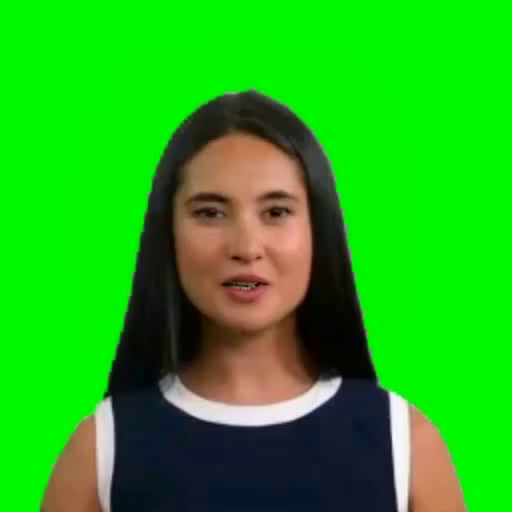

fps =  25.0
frames =  173
interval =  1


In [ ]:
video = 'video_retalking_result.mp4' #@param {type:"string"}
video_file = '/content/'+video
image_dir='inputs/frame/'
image_file='%s.png'

# video_2_images
reset_folder('inputs/frame')
fps, i, interval = video_2_images(video_file, image_dir, image_file)

from google.colab.patches import cv2_imshow
img = cv2.imread('inputs/frame/000000.png')
cv2_imshow(img)

print('fps = ', fps)
print('frames = ', i)
print('interval = ', interval)

In [ ]:
from types import FrameType
#@markdown　Enhacement Ratio

input_folder = 'inputs/frame'
w = 0.4 #@param {type:"slider", min:0.1, max:0.9, step:0.1}
reset_folder('results/frame_'+str(w))

! python inference_codeformer.py --w $w\
                                  --test_path $input_folder\
                                  --bg_upsampler realesrgan\
                                  --face_upsample

clear_output()

print('makeing movie...')
fps_r = fps/interval
file_path = 'results/frame_'+str(w)+'/final_results/%06d.png'
! ffmpeg -y -r $fps_r -i $file_path -vcodec libx264 -pix_fmt yuv420p -loglevel error out.mp4

print('preparation for sound...')
! ffmpeg -y -i $video_file -loglevel error sound.mp3
! ffmpeg -y -i out.mp4 -i sound.mp3 -loglevel error output.mp4

# print('waiting for play movie...')
# display_mp4('output.mp4')

makeing movie...
preparation for sound...


## Output

In [ ]:
display_mp4('/content/CodeFormer/output.mp4')

In [ ]:
%cd ..

/content


## Utils
To delete a certain folder content

In [ ]:
folder = '/content/blinks'# @param {type:"string"}

import os
import shutil

for filename in os.listdir(folder):
  file_path = os.path.join(folder, filename)

  try:
    if os.path.isfile(file_path) or os.path.islink(file_path):
      os.unlink(file_path)
    elif os.path.isdir(file_path):
      shutil.rmtree(file_path)

  except:
    pass